In [7]:
import math 
import numpy as np 
import matplotlib.pyplot as plt

A = 5
k = 1
m = 1

dt = 0.001
t_max = 1000
t = np.arange(0, t_max, dt)

# Theoretical solution

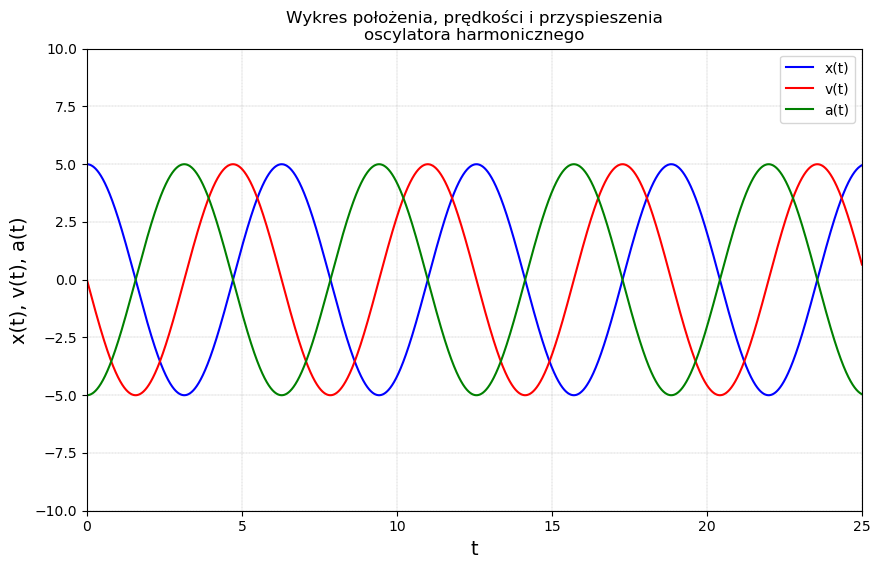

In [8]:
x_t = []
vx_t = []
ax_t = []
for item in t:
    x_t.append(A * math.cos(math.sqrt(k / m) * item))
    vx_t.append(- math.sqrt(k / m) * A * math.sin(math.sqrt(k / m) * item))
    ax_t.append(- math.sqrt(k / m) * math.sqrt(k / m) * A * math.cos(math.sqrt(k / m) * item))
    
EK_t = []
EP_t = []
EC_t = []
Eo_t = []

for i in range(len(x_t)):
    EK_t.append(0.5 * m * vx_t[i]**2)
    EP_t.append(0.5 * k * (x_t[i]**2))
    EC_t.append(EK_t[i] + EP_t[i])
    Eo_t.append(EC_t[0])

plt.figure(figsize=(10, 6))
plt.plot(t, x_t, '-b', t, vx_t, '-r', t, ax_t, '-g')
plt.title('Wykres położenia, prędkości i przyspieszenia\noscylatora harmonicznego')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('t', fontsize = '14')
plt.ylabel('x(t), v(t), a(t)', fontsize = '14')
plt.legend(['x(t)', 'v(t)', 'a(t)'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

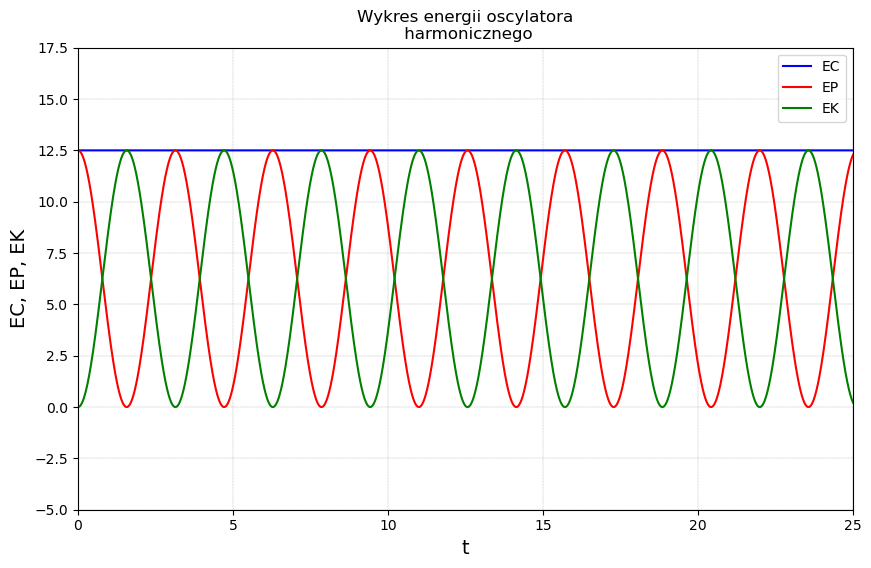

In [9]:
plt.figure(figsize=(10, 6))
plt.plot(t, EC_t, '-b', t, EP_t, '-r', t, EK_t, '-g')
plt.title('Wykres energii oscylatora\n harmonicznego')
plt.xlim(0, 25)
plt.ylim(-5, 17.5)
plt.xlabel('t', fontsize = '14')
plt.ylabel('EC, EP, EK', fontsize = '14')
plt.legend(['EC', 'EP', 'EK'], loc = 'upper right')
plt.grid(color = 'grey', linestyle = '--'
, linewidth = 0.2)
plt.show()

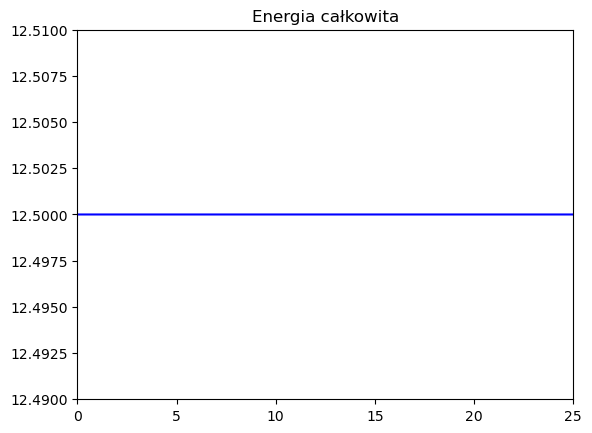

In [10]:
plt.plot(t, EC_t, '-b')
plt.title('Energia całkowita')
plt.ylim(12.49, 12.51)
plt.xlim(0, 25)
plt.show()

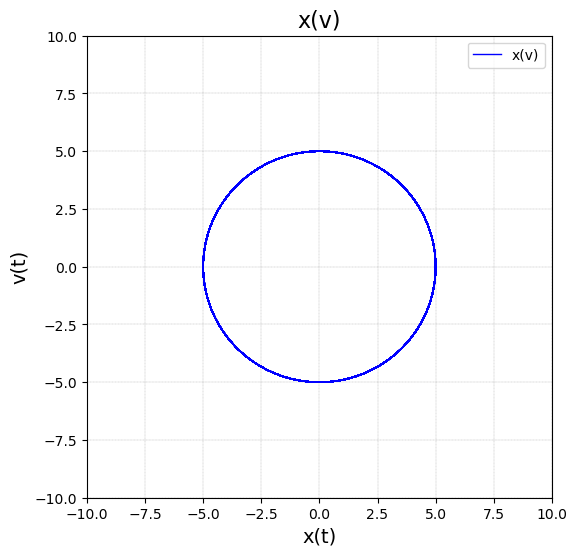

In [11]:
plt.figure(figsize=(6, 6))
plt.plot(vx_t, x_t, '-b', linewidth = 1)
plt.title('x(v)', fontsize = '16')
plt.ylabel('v(t)', fontsize = '14')
plt.xlabel('x(t)', fontsize = '14')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.grid(color='grey', linestyle='--', linewidth=0.2)
plt.legend(['x(v)'])
plt.show()

# Standard Verlet

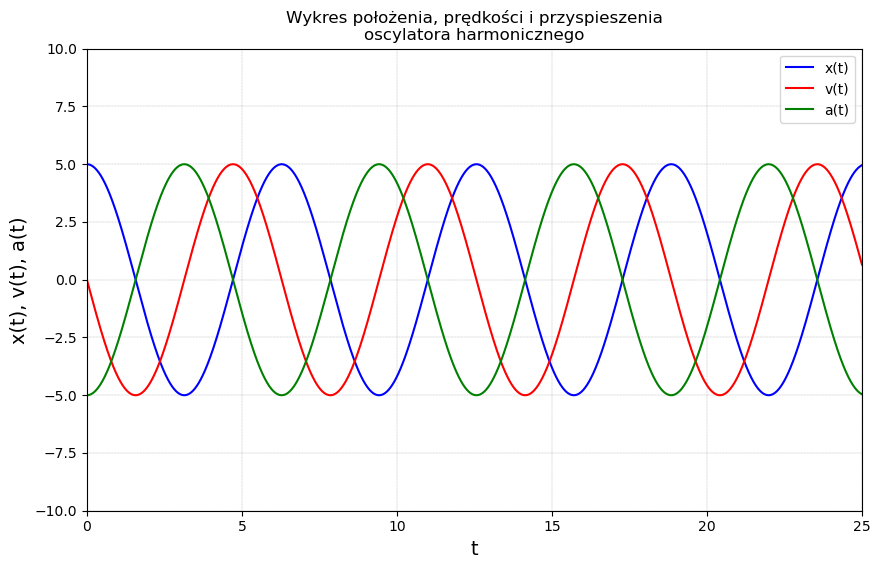

In [13]:
x_s = []
x_s.append(A);
x_s.append(math.sqrt(A**2 - (k / m) * (A * dt)**2));

vx_s = []
vx_s.append(0)

ax_s = []
ax_s.append(-(k / m) * x_s[0])
ax_s.append(-(k / m) * x_s[1])

for i in range(2, len(t)):
    x_s.append(2 * x_s[i-1] - x_s[i-2] + (dt**2) * ax_s[i-1])
    ax_s.append(-(k / m) * x_s[i])
    vx_s.append((x_s[i] - x_s[i-2]) / (2 * dt))
    
ostatni_x = 2 * x_s[-1] - x_s[-2] + (dt**2) * ax_s[-1]
vx_s.append((ostatni_x - x_s[-2]) / (2 * dt))

EK_s = []
EP_s = []
EC_s = []
Eo_s = []

for i in range(len(x_s)):
    EK_s.append(0.5 * m * vx_s[i]**2)
    EP_s.append(0.5 * k* (x_s[i])**2)
    EC_s.append(EK_s[i] + EP_s[i])
    Eo_s.append(EC_s[0])

plt.figure(figsize=(10, 6))
plt.title('Wykres położenia, prędkości i przyspieszenia\noscylatora harmonicznego')
plt.plot(t, x_s, '-b', t, vx_s, '-r', t, ax_s, '-g')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('t', fontsize = '14')
plt.ylabel('x(t), v(t), a(t)', fontsize = '14')
plt.legend(['x(t)', 'v(t)', 'a(t)'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

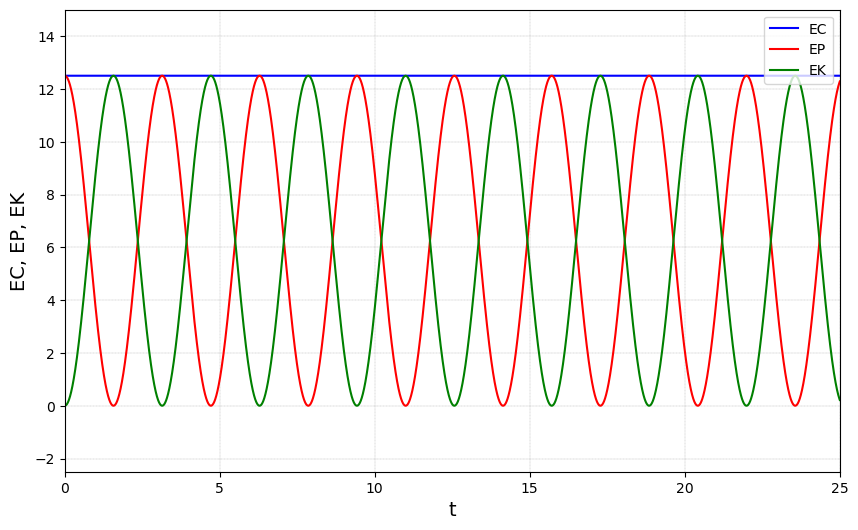

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(t, EC_s, '-b', t, EP_s, '-r', t, EK_s, '-g')
plt.xlim(0, 25)
plt.ylim(-2.5, 15)
plt.xlabel('t', fontsize = '14')
plt.ylabel('EC, EP, EK', fontsize = '14')
plt.legend(['EC', 'EP', 'EK'], loc = 'upper right')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

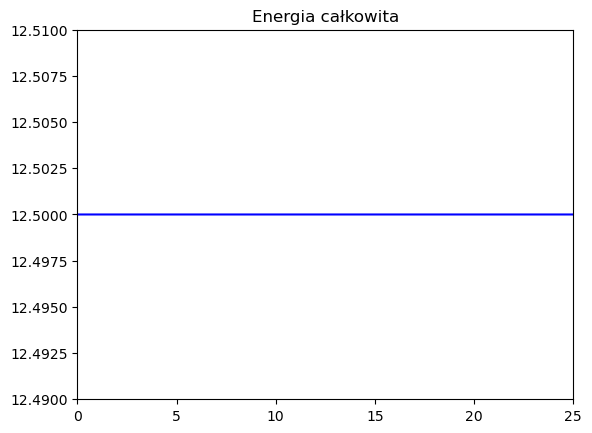

In [15]:
plt.plot(t, EC_s, '-b')
plt.title('Energia całkowita')
plt.ylim(12.49, 12.51)
plt.xlim(0, 25)
plt.show()

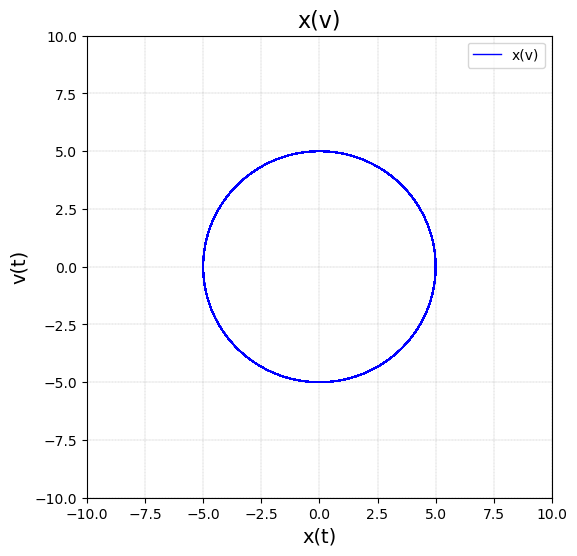

In [16]:
plt.figure(figsize=(6, 6))
plt.plot(vx_s, x_s, '-b', linewidth = 1)
plt.title('x(v)', fontsize = '16')
plt.ylabel('v(t)', fontsize = '14')
plt.xlabel('x(t)', fontsize = '14')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.grid(color='grey', linestyle='--', linewidth=0.2)
plt.legend(['x(v)'])
plt.show()

# Verlet leap-frog

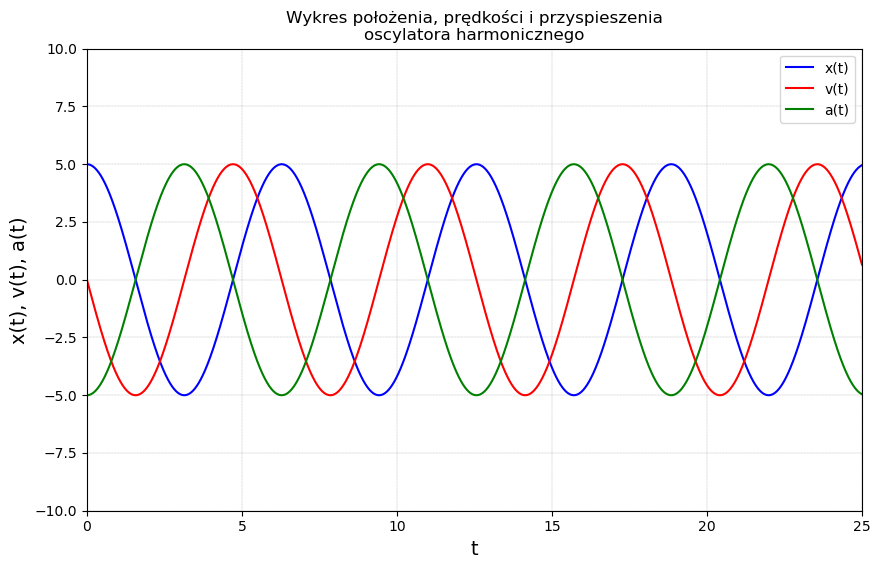

In [17]:
x_lf = [A, np.sqrt(A**2 - (k / m) * (A * dt)**2)]

xp = np.sqrt(A**2 - (k / m) * (A * 0.5 * dt)**2)
vx_lf_hs = [-(k / m) * np.sqrt(A**2 - xp**2)]

ax_lf = [-(k / m) * x_lf[0], -(k / m) * x_lf[1]]

for i in range(2, len(t) + 1):
    vx_lf_hs.append(vx_lf_hs[i-2] + dt * ax_lf[i-1])
    x_lf.append(x_lf[i-1] + dt * vx_lf_hs[i-1])
    ax_lf.append(-(k / m) * x_lf[i])
vx_lf_hs.append(vx_lf_hs[-1] + dt * ax_lf[-1])

vx_lf = [-(k / m) * np.sqrt(A**2 - x_lf[0]**2)]

for i in range(1, len(t)):
    vx_lf.append((x_lf[i+1] - x_lf[i-1]) / (2 * dt))

x_lf.pop()
ax_lf.pop()

EK_lf = [0.5 * m * v**2 for v in vx_lf]
EP_lf = [0.5 * k * (x**2) for x in x_lf]
EC_lf = [EK + EP for EK, EP in zip(EK_lf, EP_lf)]
Eo_lf = [EC_lf[0] for _ in range(len(EC_lf))]

plt.figure(figsize=(10, 6))
plt.title('Wykres położenia, prędkości i przyspieszenia\noscylatora harmonicznego')
plt.plot(t, x_lf, '-b', t, vx_lf, '-r', t, ax_lf, '-g')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('t', fontsize = '14')
plt.ylabel('x(t), v(t), a(t)', fontsize = '14')
plt.legend(['x(t)', 'v(t)', 'a(t)'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

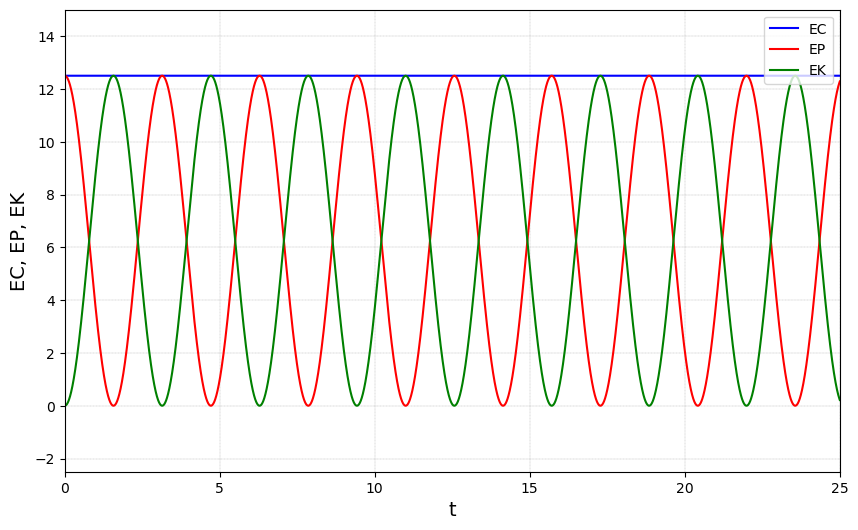

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(t, EC_lf, '-b', t, EP_lf, '-r', t, EK_lf, '-g')
plt.xlim(0, 25)
plt.ylim(-2.5, 15)
plt.xlabel('t', fontsize = '14')
plt.ylabel('EC, EP, EK', fontsize = '14')
plt.legend(['EC', 'EP', 'EK'], loc = 'upper right')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

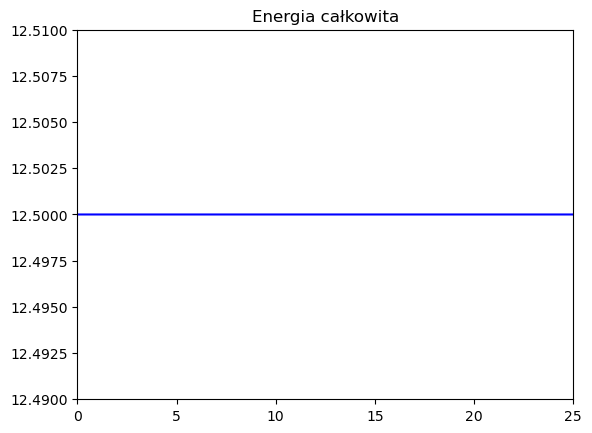

In [19]:
plt.plot(t, EC_lf, '-b')
plt.title('Energia całkowita')
plt.ylim(12.49, 12.51)
plt.xlim(0, 25)
plt.show()

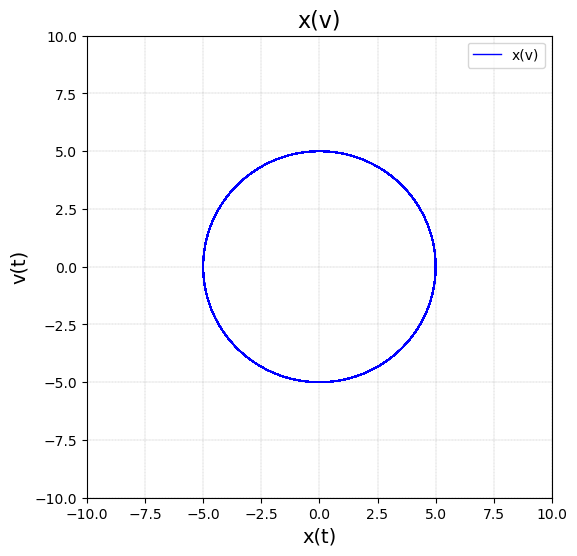

In [20]:
plt.figure(figsize=(6, 6))
plt.plot(vx_lf, x_lf, '-b', linewidth = 1)
plt.title('x(v)', fontsize = '16')
plt.ylabel('v(t)', fontsize = '14')
plt.xlabel('x(t)', fontsize = '14')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.grid(color='grey', linestyle='--', linewidth=0.2)
plt.legend(['x(v)'])
plt.show()

# Velocity Verlet

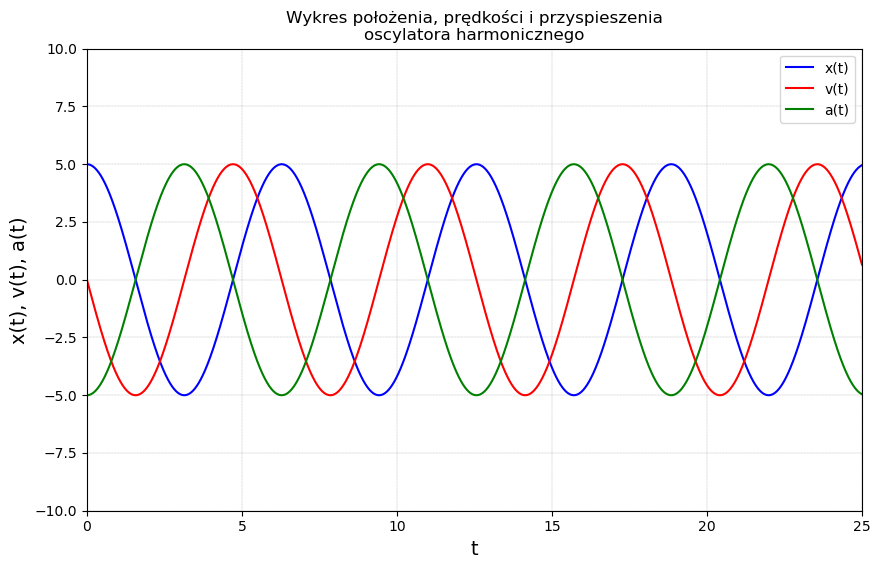

In [21]:
x_vv = [A]

vx_vv = [0]

ax_vv = [-(k / m) * x_vv[0]]

for i in range(1, len(t)):
    x_vv.append(x_vv[i-1] + vx_vv[i-1] * dt + 0.5 * ax_vv[i-1] * dt**2)
    ax_vv.append(-(k / m) * x_vv[i])
    vx_vv.append(vx_vv[i-1] + 0.5 * (ax_vv[i-1] + ax_vv[i]) * dt)

EK_vv = [0.5 * m * v**2 for v in vx_vv]
EP_vv = [0.5 * k * (x**2) for x in x_vv]
EC_vv = [EK + EP for EK, EP in zip(EK_vv, EP_vv)]
Eo_vv = [EC_vv[0] for _ in range(len(EC_vv))]

plt.figure(figsize=(10, 6))
plt.title('Wykres położenia, prędkości i przyspieszenia\noscylatora harmonicznego')
plt.plot(t, x_vv, '-b', t, vx_vv, '-r', t, ax_vv, '-g')
plt.xlim(0, 25)
plt.ylim(-10, 10)
plt.xlabel('t', fontsize = '14')
plt.ylabel('x(t), v(t), a(t)', fontsize = '14')
plt.legend(['x(t)', 'v(t)', 'a(t)'])
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

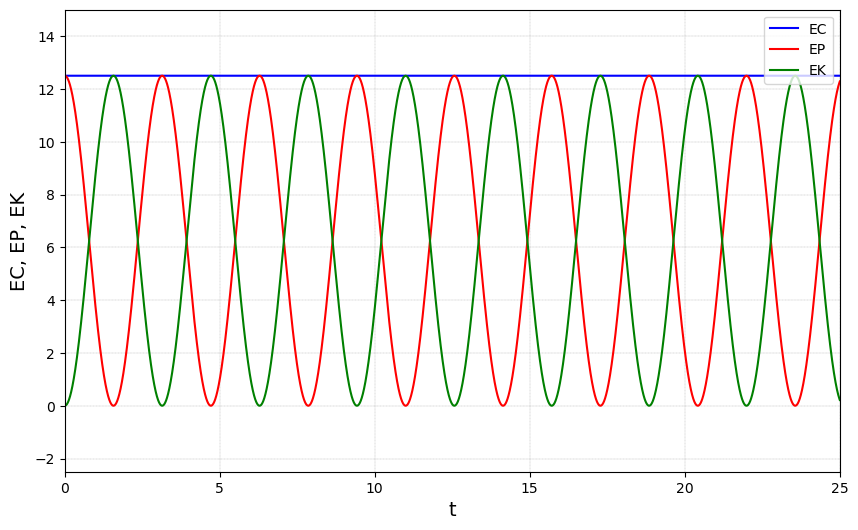

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(t, EC_vv, '-b', t, EP_vv, '-r', t, EK_vv, '-g')
plt.xlim(0, 25)
plt.ylim(-2.5, 15)
plt.xlabel('t', fontsize = '14')
plt.ylabel('EC, EP, EK', fontsize = '14')
plt.legend(['EC', 'EP', 'EK'], loc = 'upper right')
plt.grid(color = 'grey', linestyle = '--', linewidth = 0.2)
plt.show()

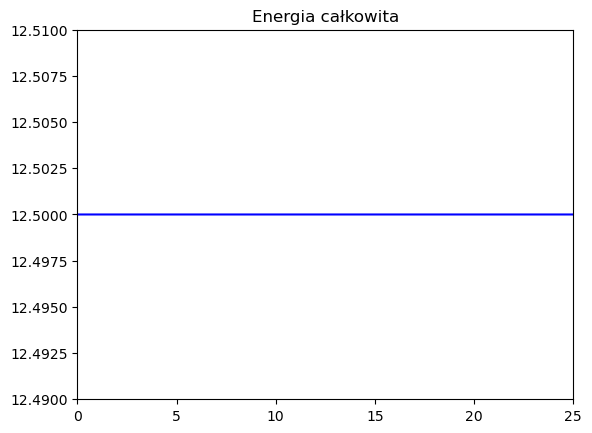

In [23]:
plt.plot(t, EC_vv, '-b')
plt.title('Energia całkowita')
plt.ylim(12.49, 12.51)
plt.xlim(0, 25)
plt.show()

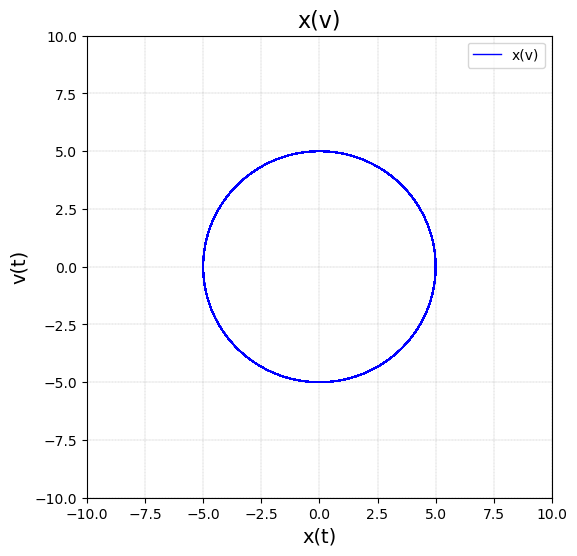

In [24]:
plt.figure(figsize=(6, 6))
plt.plot(vx_vv, x_vv, '-b', linewidth = 1)
plt.title('x(v)', fontsize = '16')
plt.ylabel('v(t)', fontsize = '14')
plt.xlabel('x(t)', fontsize = '14')
plt.ylim(-10, 10)
plt.xlim(-10, 10)
plt.grid(color='grey', linestyle='--', linewidth=0.2)
plt.legend(['x(v)'])
plt.show()

# Pomysł na wykres dH(dt) (faza testów xD)

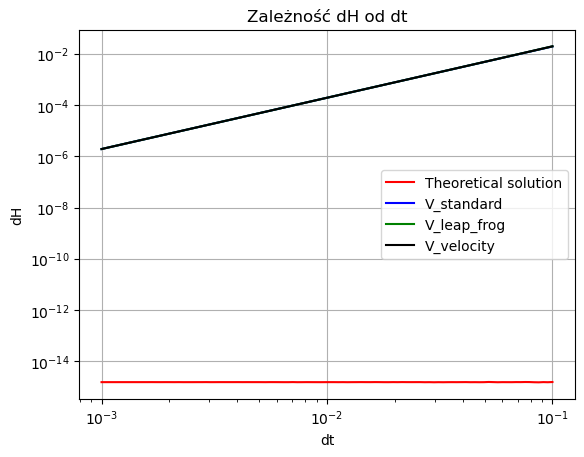

In [44]:
def theoretical_solution(dt, t_max):
    A = 5
    k = 1
    m = 1
    t = np.arange(0, t_max, dt)

    x_t = []
    vx_t = []
    ax_t = []
    for item in t:
        x_t.append(A * math.cos(math.sqrt(k / m) * item))
        vx_t.append(- math.sqrt(k / m) * A * math.sin(math.sqrt(k / m) * item))
        ax_t.append(- math.sqrt(k / m) * math.sqrt(k / m) * A * math.cos(math.sqrt(k / m) * item))
        
    EK_t = []
    EP_t = []
    EC_t = []
    Eo_t = []
    
    for i in range(len(x_t)):
        EK_t.append(0.5 * m * vx_t[i]**2)
        EP_t.append(0.5 * k * (x_t[i]**2))
        EC_t.append(EK_t[i] + EP_t[i])
        Eo_t.append(EC_t[0])
    return Eo_t, EC_t

def Verlet_standard(dt, t_max):
    A = 5
    k = 1
    m = 1
    t = np.arange(0, t_max, dt)

    x_s = []
    x_s.append(A)
    x_s.append(math.sqrt(A**2 - (k / m) * (A * dt)**2))
    
    vx_s = []
    vx_s.append(0)
    
    ax_s = []
    ax_s.append(-(k / m) * x_s[0])
    ax_s.append(-(k / m) * x_s[1])
    
    for i in range(2, len(t)):
        x_s.append(2 * x_s[i-1] - x_s[i-2] + (dt**2) * ax_s[i-1])
        ax_s.append(-(k / m) * x_s[i])
        vx_s.append((x_s[i] - x_s[i-2]) / (2 * dt))
        
    ostatni_x = 2 * x_s[-1] - x_s[-2] + (dt**2) * ax_s[-1]
    vx_s.append((ostatni_x - x_s[-2]) / (2 * dt))
    
    EK_s = []
    EP_s = []
    EC_s = []
    Eo_s = []
    
    for i in range(len(x_s)):
        EK_s.append(0.5 * m * vx_s[i]**2)
        EP_s.append(0.5 * k * (x_s[i])**2)
        EC_s.append(EK_s[i] + EP_s[i])
        Eo_s.append(EC_s[0])
    
    return Eo_s, EC_s

def Verlet_leap_frog(dt, t_max):
    A = 5
    k = 1
    m = 1
    t = np.arange(0, t_max, dt)

    x_lf = [A, np.sqrt(A**2 - (k / m) * (A * dt)**2)]

    xp = np.sqrt(A**2 - (k / m) * (A * 0.5 * dt)**2)
    vx_lf_hs = [-(k / m) * np.sqrt(A**2 - xp**2)]
    
    ax_lf = [-(k / m) * x_lf[0], -(k / m) * x_lf[1]]
    
    for i in range(2, len(t) + 1):
        vx_lf_hs.append(vx_lf_hs[i-2] + dt * ax_lf[i-1])
        x_lf.append(x_lf[i-1] + dt * vx_lf_hs[i-1])
        ax_lf.append(-(k / m) * x_lf[i])
    vx_lf_hs.append(vx_lf_hs[-1] + dt * ax_lf[-1])
    
    vx_lf = [-(k / m) * np.sqrt(A**2 - x_lf[0]**2)]
    
    for i in range(1, len(t)):
        vx_lf.append((x_lf[i+1] - x_lf[i-1]) / (2 * dt))
    
    x_lf.pop()
    ax_lf.pop()
    
    EK_lf = [0.5 * m * v**2 for v in vx_lf]
    EP_lf = [0.5 * k * (x**2) for x in x_lf]
    EC_lf = [EK + EP for EK, EP in zip(EK_lf, EP_lf)]
    Eo_lf = [EC_lf[0] for _ in range(len(EC_lf))]
    return Eo_lf, EC_lf

def Verlet_velocity(dt, t_max):
    A = 5
    k = 1
    m = 1
    t = np.arange(0, t_max, dt)

    x_vv = [A]

    vx_vv = [0]
    
    ax_vv = [-(k / m) * x_vv[0]]
    
    for i in range(1, len(t)):
        x_vv.append(x_vv[i-1] + vx_vv[i-1] * dt + 0.5 * ax_vv[i-1] * dt**2)
        ax_vv.append(-(k / m) * x_vv[i])
        vx_vv.append(vx_vv[i-1] + 0.5 * (ax_vv[i-1] + ax_vv[i]) * dt)
    
    EK_vv = [0.5 * m * v**2 for v in vx_vv]
    EP_vv = [0.5 * k * (x**2) for x in x_vv]
    EC_vv = [EK + EP for EK, EP in zip(EK_vv, EP_vv)]
    Eo_vv = [EC_vv[0] for _ in range(len(EC_vv))]
    return Eo_vv, EC_vv

dt_values = np.logspace(-3, -1, 100)
dH1_values = []
dH2_values = []
dH3_values = []
dH4_values = []

for dt in dt_values:
    Eo_t, EC_t = theoretical_solution(dt, 1000)
    dH1 = np.sqrt(np.mean(np.power(np.subtract(Eo_t, EC_t), 2)))
    dH1_values.append(dH1)

    Eo_s, EC_s = Verlet_standard(dt, 1000)
    dH2 = np.sqrt(np.mean(np.power(np.subtract(Eo_s, EC_s), 2)))
    dH2_values.append(dH2)

    Eo_lf, EC_lf = Verlet_leap_frog(dt, 1000)
    dH3 = np.sqrt(np.mean(np.power(np.subtract(Eo_lf, EC_lf), 2)))
    dH3_values.append(dH3)

    Eo_vv, EC_vv= Verlet_velocity(dt, 1000)
    dH4 = np.sqrt(np.mean(np.power(np.subtract(Eo_lf, EC_lf), 2)))
    dH4_values.append(dH4)

plt.plot(dt_values, dH1_values, '-r', label='Theoretical solution')
plt.plot(dt_values, dH2_values, '-b', label='V_standard') 
plt.plot(dt_values, dH3_values, '-g', label='V_leap_frog') 
plt.plot(dt_values, dH4_values, '-k', label='V_velocity') 
plt.xscale('log') 
plt.yscale('log')
plt.xlabel('dt') 
plt.ylabel('dH') 
plt.title('Zależność dH od dt') 
plt.legend() 
plt.grid(True) 
plt.show()

# nie chce mi sie juz testowac czy sie pokrywaja ze soba :((